In [287]:
import numpy as np 
import imutils 
import cv2 as cv

import matplotlib.pyplot as plt


In [288]:
!rm Detected_Questions/*

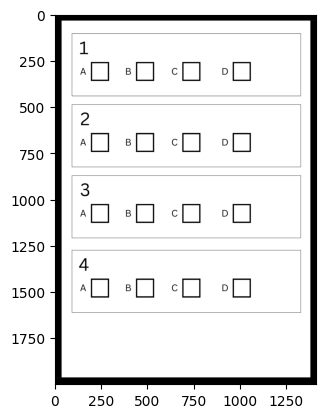

In [289]:
# sheet = cv.imread('Question_Sheet_Scans/sheet1.png')
sheet = cv.imread('ideal_sheet.png')

grey = cv.cvtColor(sheet, cv.COLOR_BGR2GRAY)

plt.imshow(cv.cvtColor(sheet, cv.COLOR_BGR2RGB))
plt.show()

In [290]:
# Threshold the image
ret,thresh = cv.threshold(grey,150,255,1)


# thresh = cv.blur(thresh,(9,9))

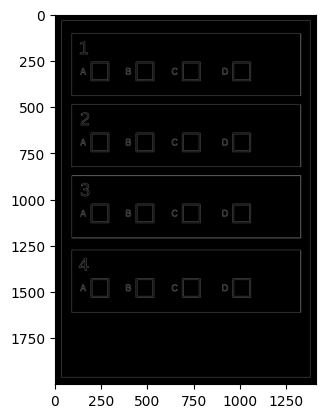

In [291]:

canny_lower_threshold = 150
canny_upper_threshold= 200

    ## Detect Edges 
canny_image = cv.Canny( thresh,
                            canny_lower_threshold,
                            canny_upper_threshold

                            )

cv.imwrite("canny.png", canny_image)

plt.imshow(cv.cvtColor(canny_image, cv.COLOR_GRAY2RGB))

plt.show()


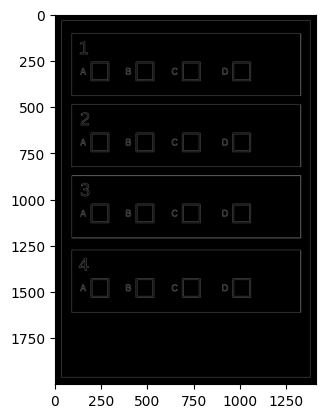

In [292]:
opening_kernel =  cv.getStructuringElement(
            cv.MORPH_ELLIPSE, 
            (9, 9)
        )
    

    ## Closing 
opened_image = cv.morphologyEx(
            canny_image,
            cv.MORPH_OPEN,
            opening_kernel,
            iterations=3
        )

cv.imwrite("opened.png", canny_image)

plt.imshow(cv.cvtColor(canny_image, cv.COLOR_GRAY2RGB))

plt.show()

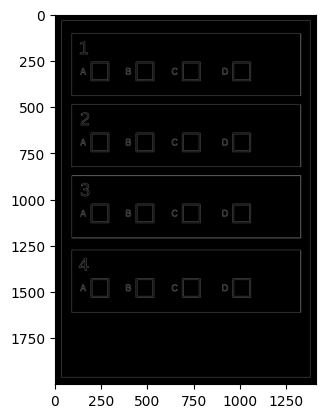

In [293]:
closing_kernel =  cv.getStructuringElement(
            cv.MORPH_ELLIPSE, 
            (3, 3)
        )
    

    ## Closing 
closed_image = cv.morphologyEx(
            canny_image,
            cv.MORPH_CLOSE,
            closing_kernel,
            iterations=3
        )

cv.imwrite("closed.png", canny_image)

plt.imshow(cv.cvtColor(canny_image, cv.COLOR_GRAY2RGB))

plt.show()

In [294]:

# Find contours in the image
contours,h = cv.findContours(opened_image,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE )

In [295]:
# For each contour found, find a shape to approximately represent it
# then draw it on the image in red.

id = 0 

for cnt in contours:
  
    approx = cv.approxPolyDP(cnt,0.01*cv.arcLength(cnt,True),True)

    if len(approx)==4:
        area =   cv.contourArea(cnt)


        if 20000<area:
            print("SQUARE: ", str(area))


            x, y, w, h = cv.boundingRect(cnt)
            q = grey[y:y + h, x:x + w]
            cv.imwrite("Detected_Questions/"+str(id)+".png" , q)


            

            id += 1

        print(cv.contourArea(cnt))
        cv.drawContours(sheet,[cnt],0,(0,0,255),1)
   

# Save the output image
cv.imwrite('shapes.png', sheet)

True

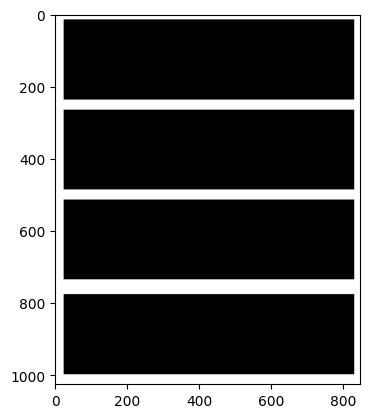

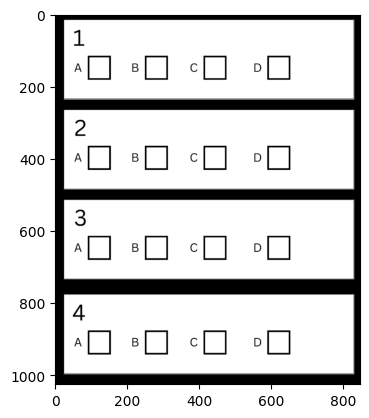

In [299]:
img =  cv.imread('ideal_sheet_no_border.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

thresh_inv = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)[1]

# Blur the image
blur = cv.GaussianBlur(thresh_inv,(1,1),0)

thresh = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1]

# find contours
contours = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

mask = np.ones(img.shape[:2], dtype="uint8") * 255

id = 0


for c in contours:
    # get the bounding rect
    x, y, w, h = cv.boundingRect(c)
    if w*h>1000:
        cv.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 255), -1)
        cv.imwrite("Detected_Questions/"+str(id)+".png" , img[y:y + h, x:x + w] )
        id+=1


res_final = cv.bitwise_and(img, img, mask=cv.bitwise_not(mask))



plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv.cvtColor(res_final, cv.COLOR_BGR2RGB))
plt.show()
# cv.imshow("boxes", mask)
# cv.imshow("final image", res_final)
# cv.waitKey(0)
# cv.destroyAllWindows()